In [15]:
from pytheus import help_functions as hf, theseus as th, fancy_classes as fc
from neuralnet import load_model
from datagen import generatorGraphFidelity
import matplotlib.pyplot as plt
import torch

model = load_model('models/6partGHZ.pt', 'cpu', 60, 1, 1)
DIM = [2] * 6
kets = hf.makeState('000000+111111')
state = fc.State(kets, normalize=True)

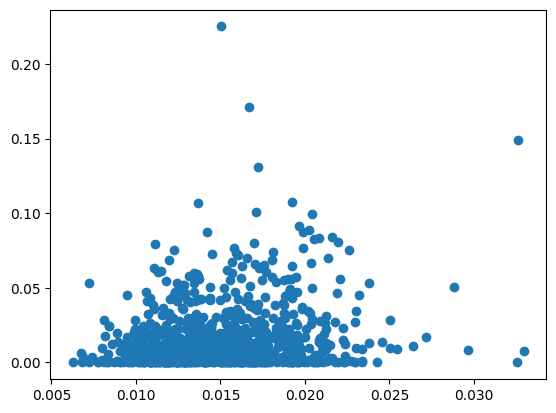

In [16]:
#scatterplot ground-truth vs. prediction
x = []
y = []
for i in range(1000):
    input_graph, ket_amplitudes, output_fidelity = generatorGraphFidelity(DIM, state, short_output=False)
    input = torch.tensor(input_graph.weights, dtype=torch.float).to('cpu')
    x.append(float(model(input)))
    y.append(output_fidelity)
plt.scatter(x, y)